# 기계학습 및 실습 2024년 2학기 중간과제
## 타이타닉 데이터셋 분석
###### 인공지능융합학부 2021100945 한준희

## 데이터 불러오기 및 라이브러리

In [147]:
# 외부, 내부 라이브러리 import
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
warnings.filterwarnings('ignore') #경고메세지 무시


In [148]:
# 변수에 데이터 저장
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

## 불러온 데이터 확인하기

In [149]:
train.head() # train 데이터에서 상위 5개 데이터 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
test.head() # test 데이터에서 상위 5개 데이터 추출


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [151]:
gender.head() # gender 데이터에서 상위 5개 데이터 추출


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [152]:
train.tail() # train 데이터 끝에서부터 5개 데이터 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [153]:
test.tail() # test 데이터 끝에서부터 5개 데이터 추출

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [154]:
gender.tail() # gender 데이터 끝에서부터 5개 데이터 추출

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [155]:
# 데이터의 0번째 row 확인
train.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

# 데이터 분석
- PassengerId : 탑승객 고유번호
- Survived : 생존 = 0, 사망 = 1
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- age = 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수 /
C = Cherbourg,
Q = Queenstown,
S = Southampton

### 데이터 정보

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [158]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Dataframe의 각 열에 대한 통계값 확인 (문자열X)

In [159]:
train.describe()
#훈련 데이터 샘플 수 : 891 (count=891)
#훈련 데이터 샘플 내 생존율 : 38.4% (mean의 Survived=0.383838)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
# 훈련 데이터 Object 변수 통계
train.describe(include=['O'])
# 훈련 데이터 남성 수 : 577명 (top의 Sex = male, freq의 Sex = 577)
# 훈련 데이터 가장 많은 승선지 : S, 644명 (top의 Embarked = S, freq의 Emabarked =644)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [161]:
# 훈련 데이터에서 객실 등급에 따른 생존율
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 객실 등급이 좋을수록 생존율이 높음

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [162]:
# 훈련 데이터에서 성별에 따른 생존율
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 여성이 남성보다 생존율이 높음

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [163]:
# 훈련 데이터에서 승선한 형제자매와 배우자 수에 따른 생존율
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 동승자 1명일 때 생존율이 높고 2명 이상은 생존율이 점점 낮아짐

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [164]:
# 훈련 데이터에서 부모와 자식의 수에 따른 생존율
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 동행이 적을수록 생존율 높음

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


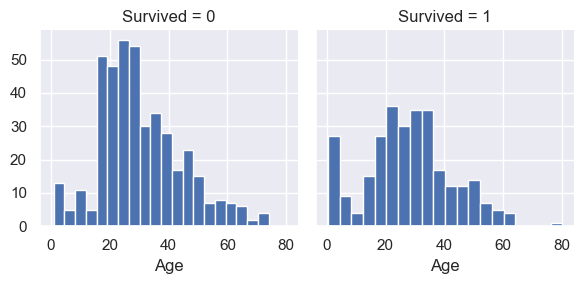

In [165]:
# 훈련 데이터에서 생존 여부에 따른 나이 분포
g = sns.FacetGrid(train, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

# 4세 이하의 유아의 생존율이 높음
# 15 ~ 25세 승객들의 생존율이 높음

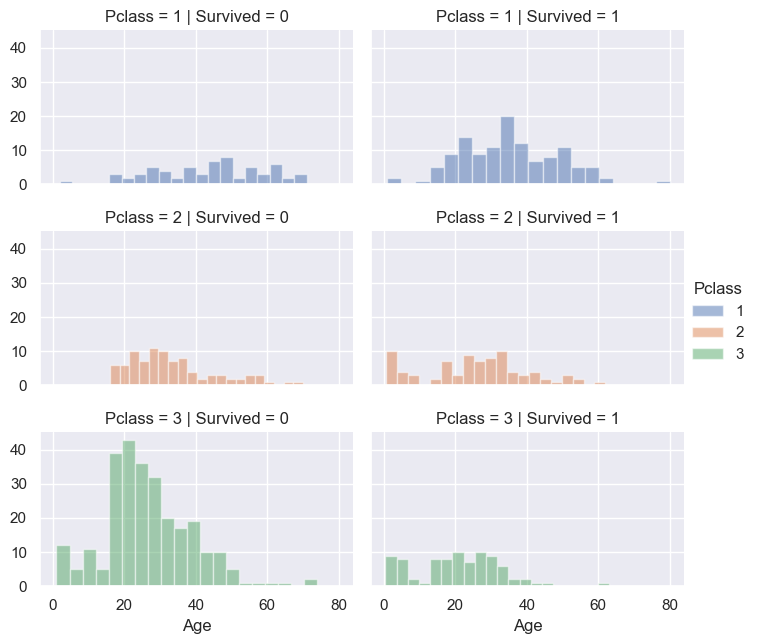

In [166]:
# 훈련 자료에서 객실 등급과 생존 여부에 따른 나이 분포
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) 

grid.add_legend();

# 객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
# 객실 등급이 2등급인 유아는 대부분 생존함
# 객실 등급이 1등급인 경우 생존율이 비교적 높음
 

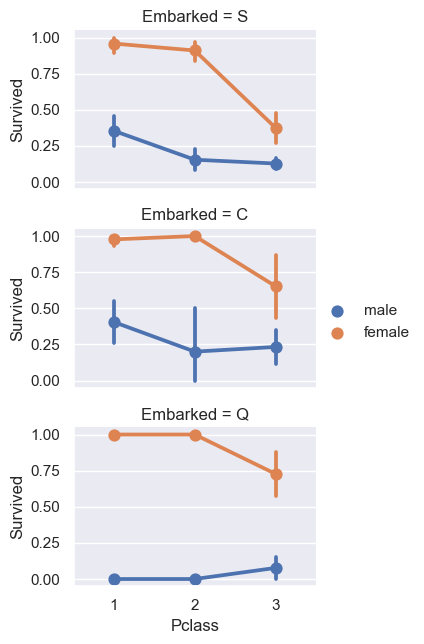

In [167]:
# 훈련자료에서 탑승지와 객실 등급에 따른 생존율
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

# 탑승지가 C와 Q인 경우, 남성의 티켓 등급이 3등급일 때 2등급보다 생존율이 높을 가능성이 있음

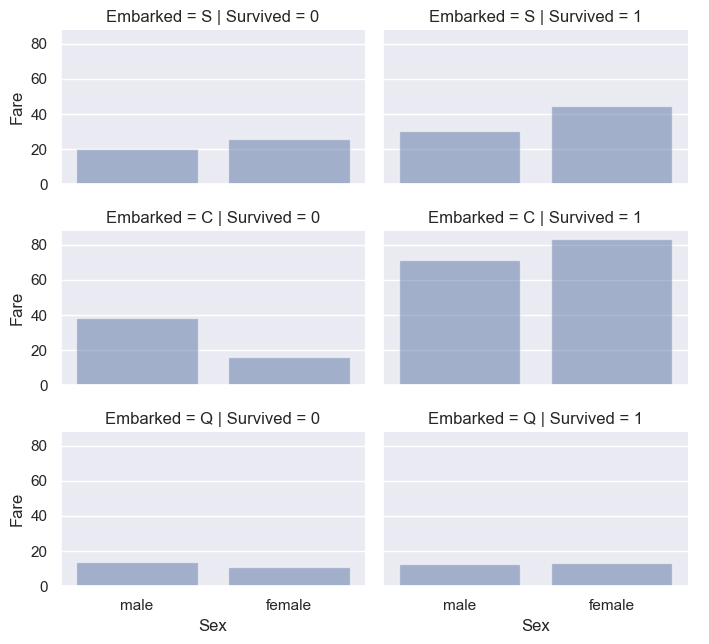

In [168]:
# 훈련 자료에서 탑승지, 생존 여부, 성별에 따른 요금
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

# 탑승지가 S또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음

## 경제적 계층과 사회적 거리 분석
    아이디어: 승객의 티켓 가격과 좌석 등급(1등석, 2등석, 3등석)을 기준으로 생존율뿐만 아니라 그들이 받았을 구조 우선순위를 분석 
    경제적 계층에 따른 사회적 거리와 구명정 배정에 대한 불평등성을 시각화
    티켓 가격 대비 생존율 분석
    각 등급별 생존율 차이의 경제적 이유 추정.

In [169]:
# 결측치 확인
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [170]:
# Pclass 와 Fare에는 결측치가 없지만 Age, Embarked, Cabin에는 결측치가 존재하므로 Age는 중간 값 대체, Embarked는 가장 빈도가 높은 값으로 대체, 
# Cabin은 결측치가 너무 많아 제외

# Age의 결측값을 중간값으로 대체
train['Age'].fillna(train['Age'].median(), inplace=True)

# Embarked의 결측값을 가장 빈도가 높은 값으로 대체
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fare의 결측값을 중간값으로 대체 (경제적 분석에 중요)
train['Fare'].fillna(train['Fare'].median(), inplace=True)

# 'Cabin'은 너무 많은 결측치가 있으므로 분석에서 제외
if 'Cabin' in train.columns:
    train.drop(columns=['Cabin'], inplace=True)
else:
    print("'Cabin' 열이 존재하지 않습니다.")

# 결측치가 모두 처리되었는지 다시 확인
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


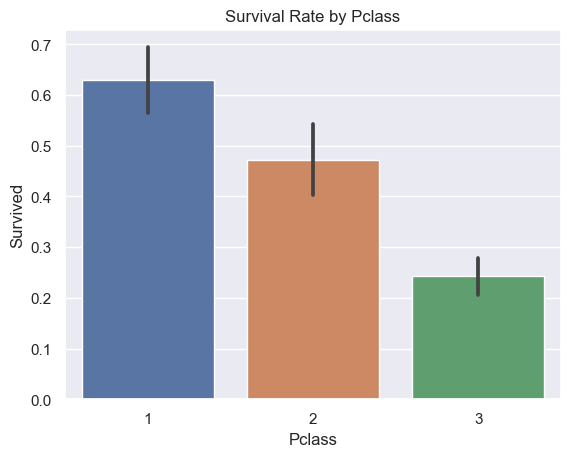

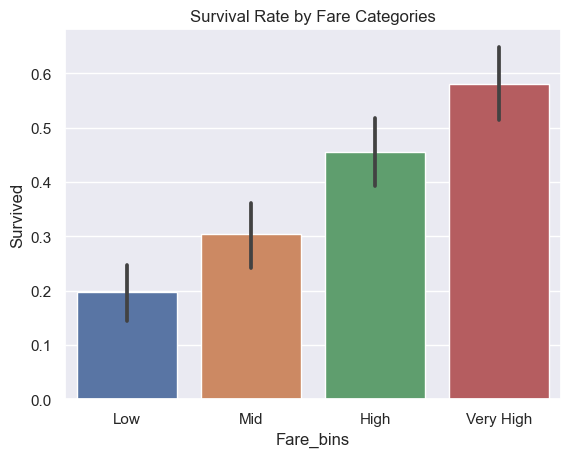

In [171]:
# Pclass별 생존율
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Pclass')
plt.show()

# Fare에 따른 생존율 시각화
train['Fare_bins'] = pd.qcut(train['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

sns.barplot(x='Fare_bins', y='Survived', data=train)
plt.title('Survival Rate by Fare Categories')
plt.show()


#### 추측 :  
            1등석 승객의 생존율이 제일 높고 2등석, 3등석 순으로 생존율이 높음
            티켓 가격을 많이 낸 순으로 생존율이 높음
            객실 등급과 요금에 관한 생존율을 확인하면 사회적, 경제적 불평등이 생존율에 직접적인 영향을 미쳤음을 확인 가능

In [115]:
# 통계적 검증, 로지스틱 회귀, 훈련세트와 테스트세트 분리, 모델 성능 평가 라이브러리 import
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 통계적 검증

In [173]:
# 객실등급과 생존율의 카이제곱 검정

# Pclass와 Survived 변수를 기준으로 교차표, 교차표는 두 변수간의 빈도수를 나타냄
crosstab = pd.crosstab(train['Pclass'], train['Survived'])
# 카이제곱 검정 수행
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
# 카이제곱 검정 결과가 0.05 보다 작으면 독립적임
print(f'Pclass와 생존율의 카이제곱 검정 결과: p-value = {p_val}')

Pclass와 생존율의 카이제곱 검정 결과: p-value = 4.549251711298793e-23


In [174]:
# 요금과 생존 여부의 t-검정

# Survived 값이 1인 생존한 승객들의 Fare 값을 추출하여 fare_survived라는 변수에 저장, 생존한 승객들의 요금 데이터
fare_survived = train[train['Survived'] == 1]['Fare']
# Survived 값이 0인 사망한 승객들의 Fare 값을 추출하여 fare_not_survived라는 변수에 저장 사망한 승객들의 요금 데이터
fare_not_survived = train[train['Survived'] == 0]['Fare']
# 독립된 샘플 간의 평균 차이가 통계적으로 유의미한지 검정하는 독립 표본 t-검정
t_stat, p_val = stats.ttest_ind(fare_survived, fare_not_survived)

print(f'Fare와 생존 여부의 t-검정 결과: p-value = {p_val}')

Fare와 생존 여부의 t-검정 결과: p-value = 6.120189341924198e-15


### 시각화

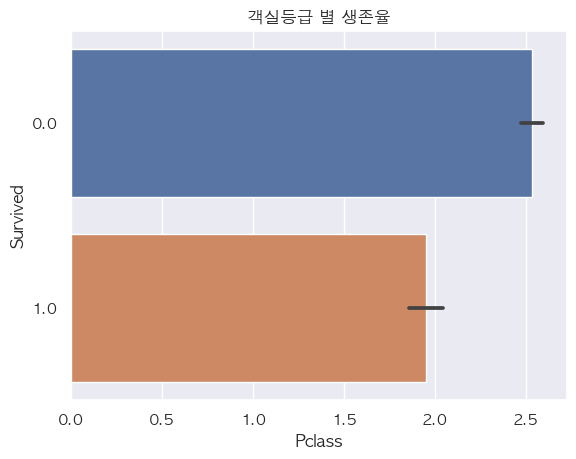

In [202]:
# 객실등급별 생존율 시각화
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('객실등급 별 생존율')
plt.show()

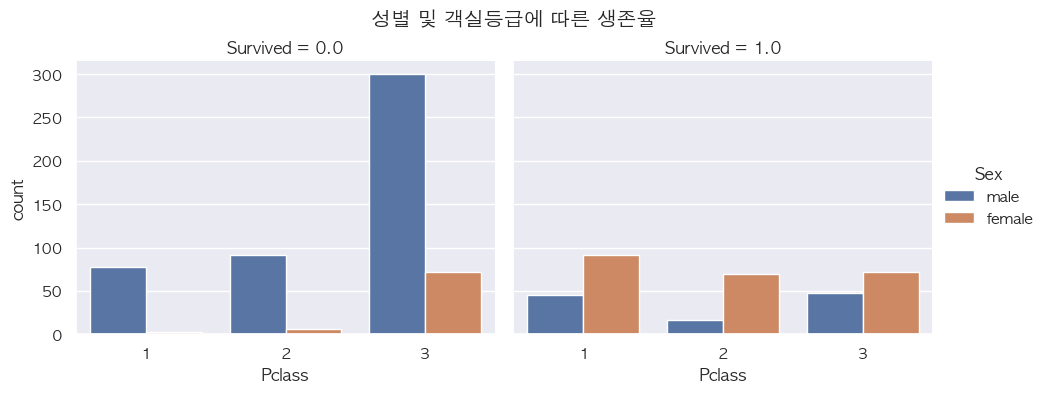

In [200]:
# 성별(Sex) 및 객실 등급(Pclass)에 따른 생존율 시각화
plt.rcParams['font.family'] = 'AppleGothic'
train['Sex'] = train['Sex'].astype(str)
train['Survived'] = train['Survived'].astype(str)

sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count", height=4, aspect=1.2)

plt.subplots_adjust(top=0.85)  
plt.suptitle('성별 및 객실등급에 따른 생존율')

# 그래프 출력
plt.show()

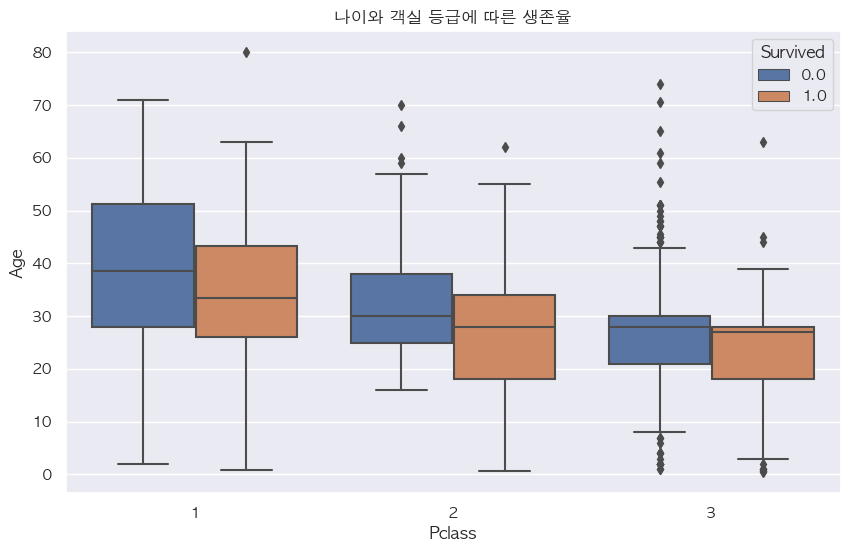

In [197]:
# 나이(Age)와 객실 등급(Pclass)에 따른 생존율 시각화
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'AppleGothic'
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train)
plt.title('나이와 객실 등급에 따른 생존율')
plt.show()

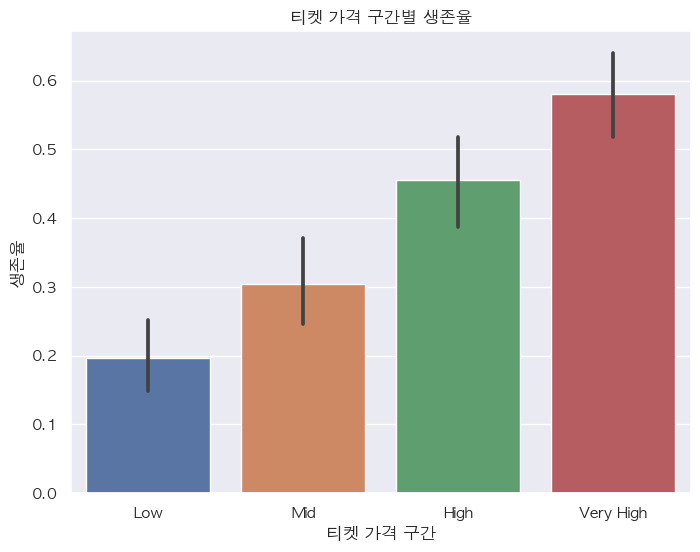

In [203]:
# 티켓 가격(Fare) 구간별 생존율 시각화

plt.rcParams['font.family'] = 'AppleGothic'  

train['Survived'] = train['Survived'].astype(float)


train['Fare_bin'] = pd.qcut(train['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])


plt.figure(figsize=(8, 6))
sns.barplot(x='Fare_bin', y='Survived', data=train, estimator='mean')
plt.title('티켓 가격 구간별 생존율')
plt.xlabel('티켓 가격 구간')
plt.ylabel('생존율')
plt.show()

### 집계 및 그룹화 

In [204]:
# 성별, 객실 등급별 생존율
grouped = train.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(grouped)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [205]:
# 나이를 그룹화하여 생존율 확인
train['Age_bin'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_grouped = train.groupby(['Age_bin', 'Pclass'])['Survived'].mean()
print(age_grouped)

Age_bin      Pclass
Child        1         0.750000
             2         1.000000
             3         0.416667
Teen         1         0.916667
             2         0.500000
             3         0.282609
Young Adult  1         0.666667
             2         0.428571
             3         0.239521
Adult        1         0.611111
             2         0.382979
             3         0.086207
Senior       1         0.214286
             2         0.333333
             3         0.200000
Name: Survived, dtype: float64


### 로지스틱 회귀 분석

In [206]:
# 분석에 사용할 변수 선택 (Pclass, Sex, Age, Fare, Embarked)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1}) 
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

In [207]:
# 특징(feature)와 목표 변수 설정
X = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = train['Survived']

In [181]:
# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# 로지스틱 회귀 모델 훈련
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [208]:
# 테스트 세트에 대한 예측 수행
y_pred = log_reg.predict(X_test)

In [209]:
# 정확도 및 혼동 행렬 출력
print(f'로지스틱 회귀 분석 정확도: {accuracy_score(y_test, y_pred)}')
print('혼동 행렬:')
print(confusion_matrix(y_test, y_pred))
print('분류 보고서:')
print(classification_report(y_test, y_pred))

로지스틱 회귀 분석 정확도: 0.7988826815642458
혼동 행렬:
[[88 17]
 [19 55]]
분류 보고서:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



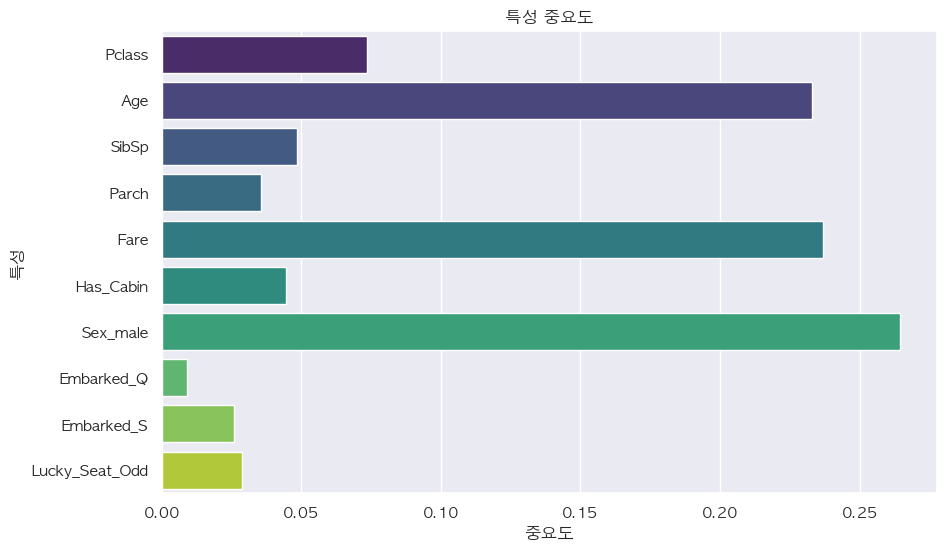

In [117]:
# 특성 중요도 시각화 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 특성 중요도 추출
feature_importance = rf.feature_importances_

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title('특성 중요도')
plt.xlabel('중요도')
plt.ylabel('특성')
plt.show()


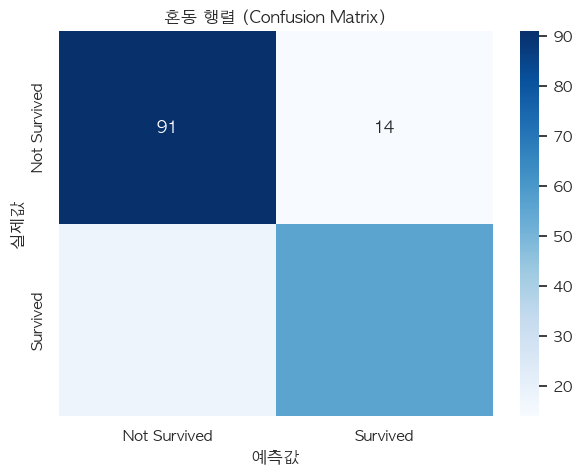

In [119]:
# 혼동행렬 시각화 
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('혼동 행렬 (Confusion Matrix)')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

## 행운의 좌석으로 생존율 분석

In [44]:
import pandas as pd
import numpy as np

# 타이타닉 데이터 로드
train = pd.read_csv('train.csv')

In [45]:
# 티켓 번호 전처리

# 숫자만 추출하는 함수
def extract_ticket_number(ticket):
    ticket = ticket.split()[-1]  # 마지막에 있는 요소가 번호일 가능성이 높음
    if ticket.isdigit():
        return int(ticket)
    return np.nan

# 티켓 번호에서 숫자만 추출
train['Ticket_number'] = train['Ticket'].apply(extract_ticket_number)

In [51]:
# 결측치 처리

# 'Age' 결측치는 평균값으로 채움
train['Age'].fillna(train['Age'].mean(), inplace=True)

# 'Embarked' 결측치는 가장 빈도가 높은 값으로 채움
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# 'Cabin'은 결측치가 많으므로, 'Cabin'이 있는지 여부로 새로운 변수를 생성
train['Has_Cabin'] = train['Cabin'].notna().astype(int)

In [50]:
# 티켓 번호 기반 '행운의 좌석' 변수 생성

# 홀수, 짝수 여부를 구분하여 새로운 변수 추가
train['Lucky_Seat'] = train['Ticket_number'].apply(lambda x: 'Odd' if x % 2 != 0 else 'Even' if pd.notna(x) else 'Unknown')

In [53]:
# 최종 데이터 확인
print(train[['Ticket', 'Ticket_number', 'Lucky_Seat', 'Age', 'Embarked', 'Has_Cabin']].head())

             Ticket  Ticket_number Lucky_Seat   Age Embarked  Has_Cabin
0         A/5 21171        21171.0        Odd  22.0        S          0
1          PC 17599        17599.0        Odd  38.0        C          1
2  STON/O2. 3101282      3101282.0       Even  26.0        S          0
3            113803       113803.0        Odd  35.0        S          1
4            373450       373450.0       Even  35.0        S          0


### 통계적 검증

In [59]:
from scipy import stats
contingency_table = pd.crosstab(train['Lucky_Seat'], train['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("카이제곱 검정 결과:")
print(f"Chi2: {chi2}, p-value: {p}")
# p-value가 0.05보다 작으면 통계적으로 유의미한 차이가 있다고 판단

카이제곱 검정 결과:
Chi2: 0.05323585665989261, p-value: 0.8175253674625033


#### p-value 값이 0.05보다 크므로 티켓번호와 생존율 관계는 우연하다

### 단일변수 시각화

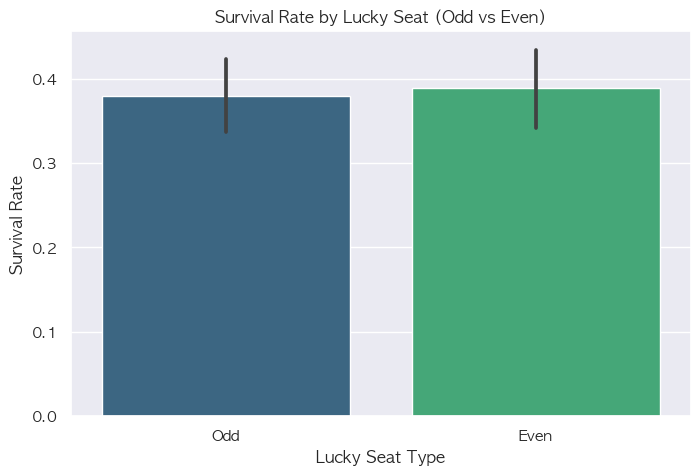

In [69]:
# Lucky_Seat에 따른 생존율 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=train, x='Lucky_Seat', y='Survived', palette='viridis')
plt.title('Survival Rate by Lucky Seat (Odd vs Even)')
plt.ylabel('Survival Rate')
plt.xlabel('Lucky Seat Type')
plt.show()

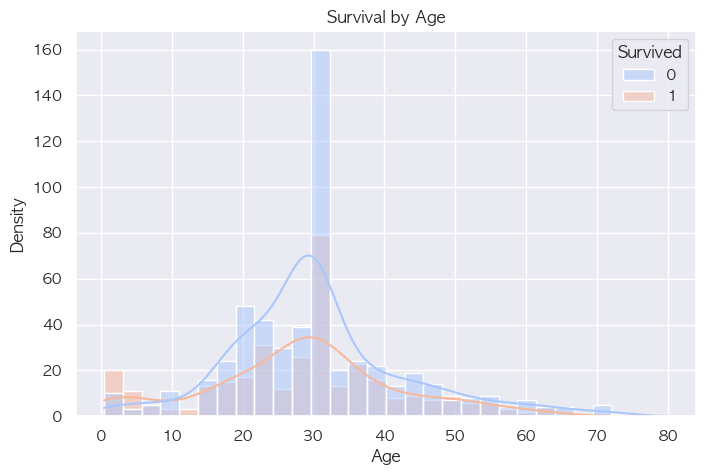

In [62]:
# 나이에 따른 생존율 시각화
plt.figure(figsize=(8, 5))
sns.histplot(data=train, x='Age', hue='Survived', kde=True, bins=30, palette='coolwarm')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

####
- 홀수 티켓이 생존율이 더 높다면, 이는 '행운의 좌석'이라는 개념이 실제로 일정 부분 존재했을 가능성을 제기합니다.
하지만 짝수 티켓이 생존율이 미세 차이로 높은걸 확인 할 수 있습니다.
- 일반적으로 어린 승객일수록 생존율이 높았다는 사실을 알 수 있습니다.

### 다중변수 시각화

<Figure size 1000x600 with 0 Axes>

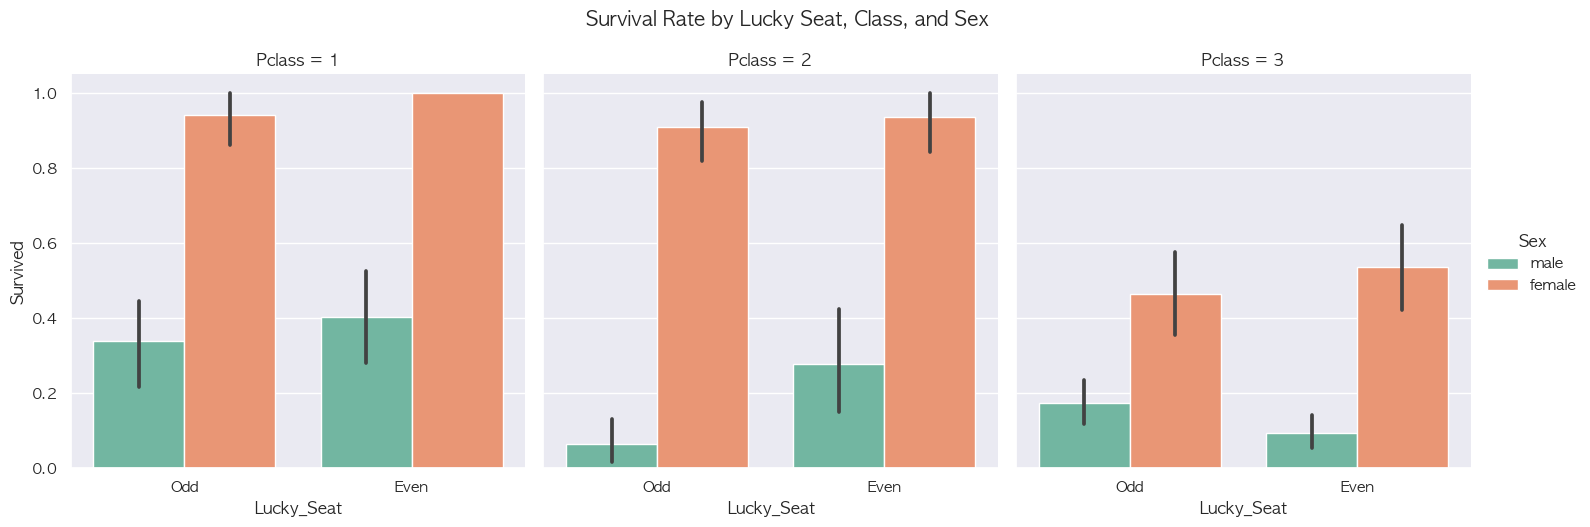

In [63]:
# Lucky_Seat, Pclass, Sex에 따른 생존율 비교
plt.figure(figsize=(10, 6))
sns.catplot(data=train, x='Lucky_Seat', y='Survived', hue='Sex', col='Pclass', kind='bar', palette='Set2')
plt.suptitle('Survival Rate by Lucky Seat, Class, and Sex', y=1.05)
plt.show()

#### 
- 1등급 승객 중에서 홀수 티켓을 가진 여성의 생존율이 가장 높다면, 티켓 번호와 더불어 객실 등급과 성별이 생존율에 중요한 요인임을 알 수 있습니다.
- 3등급 남성 승객과 같은 특정 집단에서 생존율이 극히 낮다면, 이들이 구조 우선순위에서 밀렸다는 결론을 얻을 수 있습니다.

### 집계요약 및 통계

In [64]:
# Lucky_Seat별 생존율 평균
lucky_seat_survival = train.groupby('Lucky_Seat')['Survived'].mean()
print("Lucky Seat 생존율 평균:")
print(lucky_seat_survival)

Lucky Seat 생존율 평균:
Lucky_Seat
Even    0.389021
Odd     0.379237
Name: Survived, dtype: float64


In [66]:
# Pclass와 Lucky_Seat에 따른 생존율 평균
pclass_lucky_seat_survival = train.groupby(['Pclass', 'Lucky_Seat'])['Survived'].mean()
print("\nPclass와 Lucky Seat에 따른 생존율:")
print(pclass_lucky_seat_survival)


Pclass와 Lucky Seat에 따른 생존율:
Pclass  Lucky_Seat
1       Even          0.660000
        Odd           0.603448
2       Even          0.544304
        Odd           0.419048
3       Even          0.225000
        Odd           0.258964
Name: Survived, dtype: float64


In [68]:
print("\n전체 데이터 요약 통계:")
print(train.describe())


전체 데이터 요약 통계:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Ticket_number   Has_Cabin  
count  891.000000  891.000000   8.870000e+02  891.000000  
mean     0.381594   32.204208   2.983284e+05    0.228956  
std      0.806057   49.693429   6.576144e+05    0.420397  
min      0.000000    0.000000   3.000000e+00    0.000000  
25%      0.000000    7.910400   1.487900e+04    0.000000  


### 결론 : 행운의 좌석은 생존율에 무의미하다는 것을 알 수 있다.

### 로지스틱회귀 분석

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
train = pd.read_csv('train.csv')

In [93]:
# 데이터 전처리 
train['Ticket_number'] = train['Ticket'].apply(extract_ticket_number)
train['Lucky_Seat'] = train['Ticket_number'].apply(lambda x: 'Odd' if x % 2 != 0 else 'Even' if pd.notna(x) else 'Unknown')
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Has_Cabin'] = train['Cabin'].notna().astype(int)

In [94]:
# Lucky_Seat 분포 확인
print("Lucky_Seat 분포:")
print(train['Lucky_Seat'].value_counts())

Lucky_Seat 분포:
Lucky_Seat
Odd     472
Even    419
Name: count, dtype: int64


In [100]:
# 범주형 변수 더미화
train_model = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Lucky_Seat'], drop_first=True)

print("\n생성된 더미 변수 컬럼:")
print(train_model.columns.tolist())


생성된 더미 변수 컬럼:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Ticket_number', 'Has_Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Lucky_Seat_Odd']


In [101]:
# 사용할 특성 선택
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin',
           'Sex_male', 'Embarked_Q', 'Embarked_S',  
           'Lucky_Seat_Odd', 'Lucky_Seat_Unknown']

# 컬럼 존재 여부 확인
missing_columns = [col for col in features if col not in train_model.columns]
if missing_columns:
    print("\n존재하지 않는 컬럼:", missing_columns)
    # 존재하는 Lucky_Seat 관련 컬럼 확인
    lucky_seat_cols = [col for col in train_model.columns if 'Lucky_Seat' in col]
    print("\nLucky_Seat 관련 실제 컬럼:", lucky_seat_cols)

    # features 리스트 수정
    features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin',
               'Sex_male',
               'Embarked_Q', 'Embarked_S'] + lucky_seat_cols

print("\n최종 사용 특성:", features)

X = train_model[features]
y = train_model['Survived']

X = train_model[features]
y = train_model['Survived']


존재하지 않는 컬럼: ['Lucky_Seat_Unknown']

Lucky_Seat 관련 실제 컬럼: ['Lucky_Seat_Odd']

최종 사용 특성: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Lucky_Seat_Odd']


In [102]:
#  데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
# 예측 및 평가
y_pred = model.predict(X_test_scaled)
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))


분류 보고서:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [106]:
# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

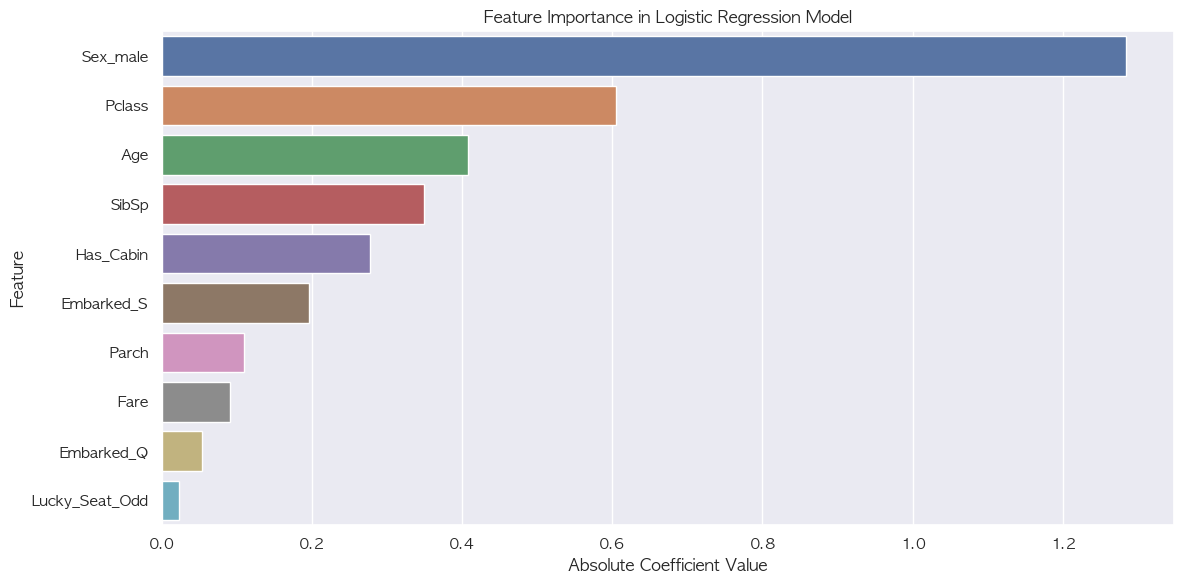

In [107]:
# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

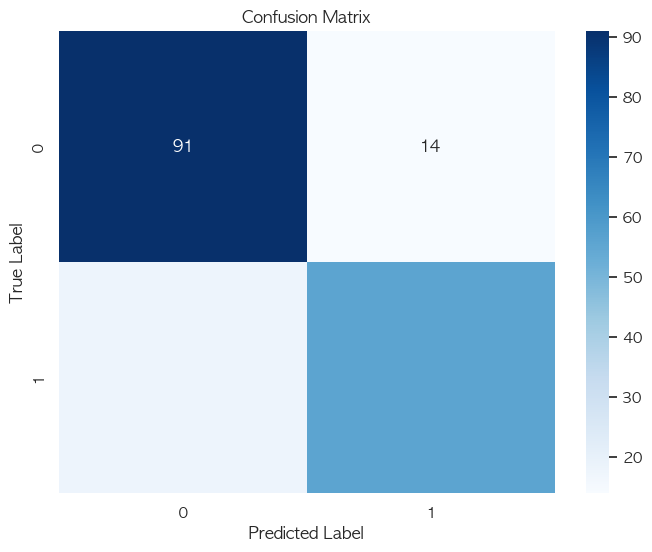

In [108]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [109]:
# 모델 성능 지표 출력
print("\n모델 계수:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\n모델 절편: {model.intercept_[0]:.4f}")


모델 계수:
Pclass: -0.6052
Age: -0.4084
SibSp: -0.3493
Parch: -0.1091
Fare: 0.0913
Has_Cabin: 0.2773
Sex_male: -1.2837
Embarked_Q: -0.0540
Embarked_S: -0.1964
Lucky_Seat_Odd: -0.0228

모델 절편: -0.6742


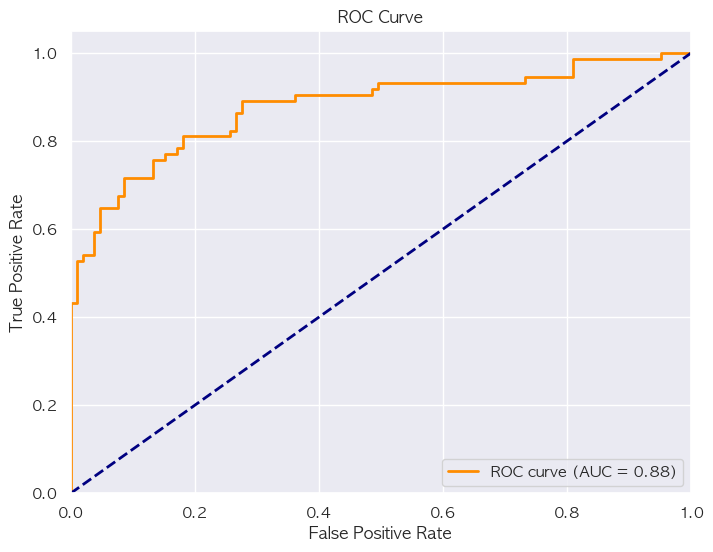

In [114]:
# ROC 커브
survival_probs = model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, survival_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [111]:
# Lucky_Seat별 생존률 분석
survival_by_lucky_seat = train.groupby('Lucky_Seat')['Survived'].agg(['mean', 'count'])
print("\nLucky_Seat별 생존률:")
print(survival_by_lucky_seat)


Lucky_Seat별 생존률:
                mean  count
Lucky_Seat                 
Even        0.389021    419
Odd         0.379237    472
